In [1]:
import numpy as np
import pandas as pd
import glob
import emcee
import corner
import scipy.stats

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

from fit_just_early_lc import prep_light_curve

from corner_hack import corner_hack
from light_curve_plot import f_t, plot_both_filt

In [2]:
%matplotlib notebook

In [3]:
info_path="../../forced_lightcurves/sample_lc_v2/"
salt_df = pd.read_csv(info_path + "../../Nobs_cut_salt2_spec_subtype.csv")

# Examine effective of fitting first 40% of light  curve

In [4]:
res_25 = pd.read_csv('results_25percent.csv')
res_30 = pd.read_csv('results_30percent.csv')
res_35 = pd.read_csv('results_35percent.csv')
res_40 = pd.read_csv('results_40percent.csv')
res_45 = pd.read_csv('results_45percent.csv')
res_50 = pd.read_csv('results_50percent.csv')

n_good = 0

consistent_list = []
for sn_num, sn in enumerate(res_35.ztf_name):
    if ((res_30['t0'].iloc[sn_num] >= res_35['t0_16'].iloc[sn_num] and 
         res_30['t0'].iloc[sn_num] <= res_35['t0_84'].iloc[sn_num]) and
        (res_30['alpha_g'].iloc[sn_num] >= res_35['alpha_g_16'].iloc[sn_num] and 
         res_30['alpha_g'].iloc[sn_num] <= res_35['alpha_g_84'].iloc[sn_num]) and 
        (res_30['alpha_r'].iloc[sn_num] >= res_35['alpha_r_16'].iloc[sn_num] and 
         res_30['alpha_r'].iloc[sn_num] <= res_35['alpha_r_84'].iloc[sn_num]) and
        (res_40['t0'].iloc[sn_num] >= res_35['t0_16'].iloc[sn_num] and 
         res_40['t0'].iloc[sn_num] <= res_35['t0_84'].iloc[sn_num]) and
        (res_40['alpha_g'].iloc[sn_num] >= res_35['alpha_g_16'].iloc[sn_num] and 
         res_40['alpha_g'].iloc[sn_num] <= res_35['alpha_g_84'].iloc[sn_num]) and 
        (res_40['alpha_r'].iloc[sn_num] >= res_35['alpha_r_16'].iloc[sn_num] and 
         res_40['alpha_r'].iloc[sn_num] <= res_35['alpha_r_84'].iloc[sn_num])
       ):
        consistent_list.append(sn)
        n_good += 1
print(n_good)

63


In [11]:
# check if 5% change is consistent
n_good = 0
consistent_list = []
for sn_num, sn in enumerate(res_35.ztf_name):
    if ((res_25['t0_95'].iloc[sn_num] >= res_30['t0_05'].iloc[sn_num] and 
         res_25['t0_05'].iloc[sn_num] <= res_30['t0_95'].iloc[sn_num]) and
        (res_25['alpha_g_95'].iloc[sn_num] >= res_30['alpha_g_05'].iloc[sn_num] and 
         res_25['alpha_g_05'].iloc[sn_num] <= res_30['alpha_g_95'].iloc[sn_num]) and 
        (res_25['alpha_r_95'].iloc[sn_num] >= res_30['alpha_r_05'].iloc[sn_num] and 
         res_25['alpha_r_05'].iloc[sn_num] <= res_30['alpha_r_95'].iloc[sn_num]) and
        (res_30['t0_95'].iloc[sn_num] >= res_35['t0_05'].iloc[sn_num] and 
         res_30['t0_05'].iloc[sn_num] <= res_35['t0_95'].iloc[sn_num]) and
        (res_30['alpha_g_95'].iloc[sn_num] >= res_35['alpha_g_05'].iloc[sn_num] and 
         res_30['alpha_g_05'].iloc[sn_num] <= res_35['alpha_g_95'].iloc[sn_num]) and 
        (res_30['alpha_r_95'].iloc[sn_num] >= res_35['alpha_r_05'].iloc[sn_num] and 
         res_30['alpha_r_05'].iloc[sn_num] <= res_35['alpha_r_95'].iloc[sn_num]) and
        (res_40['t0_95'].iloc[sn_num] >= res_35['t0_05'].iloc[sn_num] and 
         res_40['t0_05'].iloc[sn_num] <= res_35['t0_95'].iloc[sn_num]) and
        (res_40['alpha_g_95'].iloc[sn_num] >= res_35['alpha_g_05'].iloc[sn_num] and 
         res_40['alpha_g_05'].iloc[sn_num] <= res_35['alpha_g_95'].iloc[sn_num]) and 
        (res_40['alpha_r_95'].iloc[sn_num] >= res_35['alpha_r_05'].iloc[sn_num] and 
         res_40['alpha_r_05'].iloc[sn_num] <= res_35['alpha_r_95'].iloc[sn_num]) and 
        (res_45['t0_95'].iloc[sn_num] >= res_40['t0_05'].iloc[sn_num] and 
         res_45['t0_05'].iloc[sn_num] <= res_40['t0_95'].iloc[sn_num]) and
        (res_45['alpha_g_95'].iloc[sn_num] >= res_40['alpha_g_05'].iloc[sn_num] and 
         res_45['alpha_g_05'].iloc[sn_num] <= res_40['alpha_g_95'].iloc[sn_num]) and 
        (res_45['alpha_r_95'].iloc[sn_num] >= res_40['alpha_r_05'].iloc[sn_num] and 
         res_45['alpha_r_05'].iloc[sn_num] <= res_40['alpha_r_95'].iloc[sn_num]) and
        (res_50['t0_95'].iloc[sn_num] >= res_45['t0_05'].iloc[sn_num] and 
         res_50['t0_05'].iloc[sn_num] <= res_45['t0_95'].iloc[sn_num]) and
        (res_50['alpha_g_95'].iloc[sn_num] >= res_45['alpha_g_05'].iloc[sn_num] and 
         res_50['alpha_g_05'].iloc[sn_num] <= res_45['alpha_g_95'].iloc[sn_num]) and 
        (res_50['alpha_r_95'].iloc[sn_num] >= res_45['alpha_r_05'].iloc[sn_num] and 
         res_50['alpha_r_05'].iloc[sn_num] <= res_45['alpha_r_95'].iloc[sn_num])
       ):
        consistent_list.append(sn)
        n_good += 1

print(n_good)

105


In [26]:
for res_num, this_res in enumerate([res_25, res_30, res_35, res_40, res_45, res_50]):
    n_good = 0
    if res_num == 3:
        consistent_arr = np.zeros(len(res_40))
    for sn_num, sn in enumerate(this_res.ztf_name):
        if ((res_25['t0_95'].iloc[sn_num] >= this_res['t0_05'].iloc[sn_num] and 
             res_25['t0_05'].iloc[sn_num] <= this_res['t0_95'].iloc[sn_num]) and
            (res_25['alpha_g_95'].iloc[sn_num] >= this_res['alpha_g_05'].iloc[sn_num] and 
             res_25['alpha_g_05'].iloc[sn_num] <= this_res['alpha_g_95'].iloc[sn_num]) and 
            (res_25['alpha_r_95'].iloc[sn_num] >= this_res['alpha_r_05'].iloc[sn_num] and 
             res_25['alpha_r_05'].iloc[sn_num] <= this_res['alpha_r_95'].iloc[sn_num]) and
            (res_30['t0_95'].iloc[sn_num] >= this_res['t0_05'].iloc[sn_num] and 
             res_30['t0_05'].iloc[sn_num] <= this_res['t0_95'].iloc[sn_num]) and
            (res_30['alpha_g_95'].iloc[sn_num] >= this_res['alpha_g_05'].iloc[sn_num] and 
             res_30['alpha_g_05'].iloc[sn_num] <= this_res['alpha_g_95'].iloc[sn_num]) and 
            (res_30['alpha_r_95'].iloc[sn_num] >= this_res['alpha_r_05'].iloc[sn_num] and 
             res_30['alpha_r_05'].iloc[sn_num] <= this_res['alpha_r_95'].iloc[sn_num]) and
            (res_35['t0_95'].iloc[sn_num] >= this_res['t0_05'].iloc[sn_num] and 
             res_35['t0_05'].iloc[sn_num] <= this_res['t0_95'].iloc[sn_num]) and
            (res_35['alpha_g_95'].iloc[sn_num] >= this_res['alpha_g_05'].iloc[sn_num] and 
             res_35['alpha_g_05'].iloc[sn_num] <= this_res['alpha_g_95'].iloc[sn_num]) and 
            (res_35['alpha_r_95'].iloc[sn_num] >= this_res['alpha_r_05'].iloc[sn_num] and 
             res_35['alpha_r_05'].iloc[sn_num] <= this_res['alpha_r_95'].iloc[sn_num]) and
            (res_40['t0_95'].iloc[sn_num] >= this_res['t0_05'].iloc[sn_num] and 
             res_40['t0_05'].iloc[sn_num] <= this_res['t0_95'].iloc[sn_num]) and
            (res_40['alpha_g_95'].iloc[sn_num] >= this_res['alpha_g_05'].iloc[sn_num] and 
             res_40['alpha_g_05'].iloc[sn_num] <= this_res['alpha_g_95'].iloc[sn_num]) and 
            (res_40['alpha_r_95'].iloc[sn_num] >= this_res['alpha_r_05'].iloc[sn_num] and 
             res_40['alpha_r_05'].iloc[sn_num] <= this_res['alpha_r_95'].iloc[sn_num]) and
             (res_45['t0_95'].iloc[sn_num] >= this_res['t0_05'].iloc[sn_num] and 
              res_45['t0_05'].iloc[sn_num] <= this_res['t0_95'].iloc[sn_num]) and
             (res_45['alpha_g_95'].iloc[sn_num] >= this_res['alpha_g_05'].iloc[sn_num] and 
              res_45['alpha_g_05'].iloc[sn_num] <= this_res['alpha_g_95'].iloc[sn_num]) and 
             (res_45['alpha_r_95'].iloc[sn_num] >= this_res['alpha_r_05'].iloc[sn_num] and 
              res_45['alpha_r_05'].iloc[sn_num] <= this_res['alpha_r_95'].iloc[sn_num]) and 
              (res_50['t0_95'].iloc[sn_num] >= this_res['t0_05'].iloc[sn_num] and 
               res_50['t0_05'].iloc[sn_num] <= this_res['t0_95'].iloc[sn_num]) and
              (res_50['alpha_g_95'].iloc[sn_num] >= this_res['alpha_g_05'].iloc[sn_num] and 
               res_50['alpha_g_05'].iloc[sn_num] <= this_res['alpha_g_95'].iloc[sn_num]) and 
              (res_50['alpha_r_95'].iloc[sn_num] >= this_res['alpha_r_05'].iloc[sn_num] and 
               res_50['alpha_r_05'].iloc[sn_num] <= this_res['alpha_r_95'].iloc[sn_num])
           ):
            n_good += 1
            if res_num == 3:
                consistent_arr[sn_num] = 1

    print(n_good)

89
95
99
98
93
88


In [47]:
conv_all = (res_25.conv_arr.values*
    res_30.conv_arr.values*
    res_35.conv_arr.values*
    res_40.conv_arr.values*
    res_45.conv_arr.values*
    res_50.conv_arr.values)
print(sum(conv_all))

115


In [48]:
salt_df[['name','z_adopt']].iloc[np.where((conv_all == 1) & (consistent_arr == 0))]

,name,z_adopt
0,ZTF18aailmnv,0.080000
14,ZTF18aasdted,0.018150
16,ZTF18aaslhxt,0.055050
21,ZTF18aaunfqq,0.071095
29,ZTF18aaxcntm,0.026922
30,ZTF18aaxdrjn,0.033987
35,ZTF18aaxwjmp,0.080000
49,ZTF18abbpeqo,0.066741
56,ZTF18abclfee,0.029000
72,ZTF18abetehf,0.064875


Notes on this sample -- 

 * ZTF18aailmnv –– 5.5 d gap
 * ZTF18aasdted –– 4 d gap  (followed by 3 d, also low-z)
 * ZTF18aaslhxt –– gap
 * ZTF18aaunfqq –– gap
 * ZTF18aaxcntm –– gaps
 * ZTF18aaxdrjn –– gaps
 * ZTF18aaxwjmp –– small g gaps (this one confuses me)
 * ZTF18abbpeqo –– small g gap
 * ZTF18abclfee –– no gaps
 * ZTF18abetehf –– small gaps
 * ZTF18abfhryc –– small gaps
 * ZTF18abimsyv –– no gaps
 * ZTF18abjtger –– many gaps
 * ZTF18abjvhec –– big gap
 * ZTF18abpaywm –– big g gap (small r gap)
 * ZTF18abxxssh –– weird colors
 * ZTF18abxygvv –– no gaps

### Determine trends with data fit

In [69]:
increase_rise = np.where((res_50.t0.values < res_25.t0.values) &
                         (res_50.t0.values < res_30.t0.values) & 
                         (res_45.t0.values < res_25.t0.values) & 
                         (res_45.t0.values < res_30.t0.values) 
                         )

decrease_rise = np.where((res_50.t0.values > res_25.t0.values) &
                         (res_50.t0.values > res_30.t0.values) & 
                         (res_45.t0.values > res_25.t0.values) & 
                         (res_45.t0.values > res_30.t0.values) 
                         )

In [72]:
print('rise time increases for {} SN with more data'.format(len(np.intersect1d(increase_rise[0], np.where(conv_all > 0)))))
print('rise time decreases for {} SN with less data'.format(len(np.intersect1d(decrease_rise[0], np.where(conv_all > 0)))))

rise time increases for 80 SN with more data
rise time decreases for 17 SN with less data


In [86]:
print('rise time increases for {} SN with more data'.format(len(np.intersect1d(increase_rise[0], np.where(consistent_arr > 0)))))
print('rise time decreases for {} SN with less data'.format(len(np.intersect1d(decrease_rise[0], np.where(consistent_arr > 0)))))

rise time increases for 68 SN with more data
rise time decreases for 16 SN with less data


In [73]:
increase_alpha_g = np.where((res_50.alpha_g.values > res_25.alpha_g.values) &
                         (res_50.alpha_g.values > res_30.alpha_g.values) & 
                         (res_45.alpha_g.values > res_25.alpha_g.values) & 
                         (res_45.alpha_g.values > res_30.alpha_g.values) 
                         )

decrease_alpha_g = np.where((res_50.alpha_g.values < res_25.alpha_g.values) &
                         (res_50.alpha_g.values < res_30.alpha_g.values) & 
                         (res_45.alpha_g.values < res_25.alpha_g.values) & 
                         (res_45.alpha_g.values < res_30.alpha_g.values) 
                         )

In [74]:
print('alpha increases for {} SN with more data'.format(len(np.intersect1d(increase_alpha_g[0], np.where(conv_all > 0)))))
print('alpha decreases for {} SN with less data'.format(len(np.intersect1d(decrease_alpha_g[0], np.where(conv_all > 0)))))

alpha increases for 88 SN with more data
alpha decreases for 7 SN with less data


In [87]:
print('alpha increases for {} SN with more data'.format(len(np.intersect1d(increase_alpha_g[0], np.where(consistent_arr > 0)))))
print('alpha decreases for {} SN with less data'.format(len(np.intersect1d(decrease_alpha_g[0], np.where(consistent_arr > 0)))))

alpha increases for 75 SN with more data
alpha decreases for 7 SN with less data


In [35]:
res_25.iloc[np.where(salt_df.name == 'ZTF18abgmcmv')]

,ztf_name,t0,t0_05,t0_16,t0_84,t0_95,alpha_g,alpha_g_05,alpha_g_16,alpha_g_84,...,post_gap_r,delta_t0,post_max_g,post_max_r,post_min_g,post_min_r,n_nights_g_post,n_nights_r_post,n_nights_gr_post,conv_arr
79,b'ZTF18abgmcmv',-18.172891,-18.566702,-18.401342,-17.969905,-17.841312,2.17116,1.927776,2.021865,2.336717,...,0.373333,-0.067138,23.961865,22.335589,-0.625093,-0.247114,6.0,6.0,6.0,1


In [40]:
res_30.iloc[np.where(salt_df.name == 'ZTF18abgmcmv')]

,ztf_name,t0,t0_05,t0_16,t0_84,t0_95,alpha_g,alpha_g_05,alpha_g_16,alpha_g_84,...,post_gap_r,delta_t0,post_max_g,post_max_r,post_min_g,post_min_r,n_nights_g_post,n_nights_r_post,n_nights_gr_post,conv_arr
79,b'ZTF18abgmcmv',-18.17362,-18.569165,-18.402876,-17.970897,-17.842255,2.171705,1.928619,2.021128,2.336911,...,0.374062,0.002507,23.961865,22.335589,-0.625093,-0.247114,6.0,6.0,6.0,1


In [41]:
res_35.iloc[np.where(salt_df.name == 'ZTF18abgmcmv')]

,ztf_name,t0,t0_05,t0_16,t0_84,t0_95,alpha_g,alpha_g_05,alpha_g_16,alpha_g_84,...,post_gap_r,delta_t0,post_max_g,post_max_r,post_min_g,post_min_r,n_nights_g_post,n_nights_r_post,n_nights_gr_post,conv_arr
79,b'ZTF18abgmcmv',-18.334537,-18.656728,-18.523761,-18.161736,-18.056293,2.222123,2.063583,2.123621,2.330002,...,0.534979,0.048578,32.981578,31.925925,-0.625093,-0.247114,7.0,7.0,7.0,1


In [42]:
res_40.iloc[np.where(salt_df.name == 'ZTF18abgmcmv')]

,ztf_name,t0,t0_05,t0_16,t0_84,t0_95,alpha_g,alpha_g_05,alpha_g_16,alpha_g_84,...,t_rise_84,flat_alpha_g_16,flat_alpha_g_84,flat_alpha_r_16,flat_alpha_r_84,flat_delta_05,flat_delta_16,flat_delta_50,flat_delta_84,flat_delta_95
79,b'ZTF18abgmcmv',-18.070461,-18.318966,-18.217259,-17.932282,-17.84515,2.084958,1.950841,2.003029,2.171158,...,18.21948,2.190814,2.017499,1.93387,1.784468,-0.166977,-0.198127,-0.247418,-0.297461,-0.329934


In [44]:
res_45.iloc[np.where(salt_df.name == 'ZTF18abgmcmv')]

,ztf_name,t0,t0_05,t0_16,t0_84,t0_95,alpha_g,alpha_g_05,alpha_g_16,alpha_g_84,...,post_gap_r,delta_t0,post_max_g,post_max_r,post_min_g,post_min_r,n_nights_g_post,n_nights_r_post,n_nights_gr_post,conv_arr
79,b'ZTF18abgmcmv',-18.005082,-18.232876,-18.140027,-17.875868,-17.793003,2.013734,1.904995,1.947182,2.082966,...,0.205524,0.001188,43.202432,41.041709,-0.625093,-0.247114,8.0,8.0,8.0,1


In [45]:
res_50.iloc[np.where(salt_df.name == 'ZTF18abgmcmv')]

,ztf_name,t0,t0_05,t0_16,t0_84,t0_95,alpha_g,alpha_g_05,alpha_g_16,alpha_g_84,...,post_gap_r,delta_t0,post_max_g,post_max_r,post_min_g,post_min_r,n_nights_g_post,n_nights_r_post,n_nights_gr_post,conv_arr
79,b'ZTF18abgmcmv',-17.877695,-18.069887,-17.992517,-17.766155,-17.698206,1.95504,1.859822,1.896419,2.015327,...,0.078137,0.022719,43.202432,51.164538,-0.625093,-0.247114,8.0,9.0,8.0,1


<IPython.core.display.Javascript object>


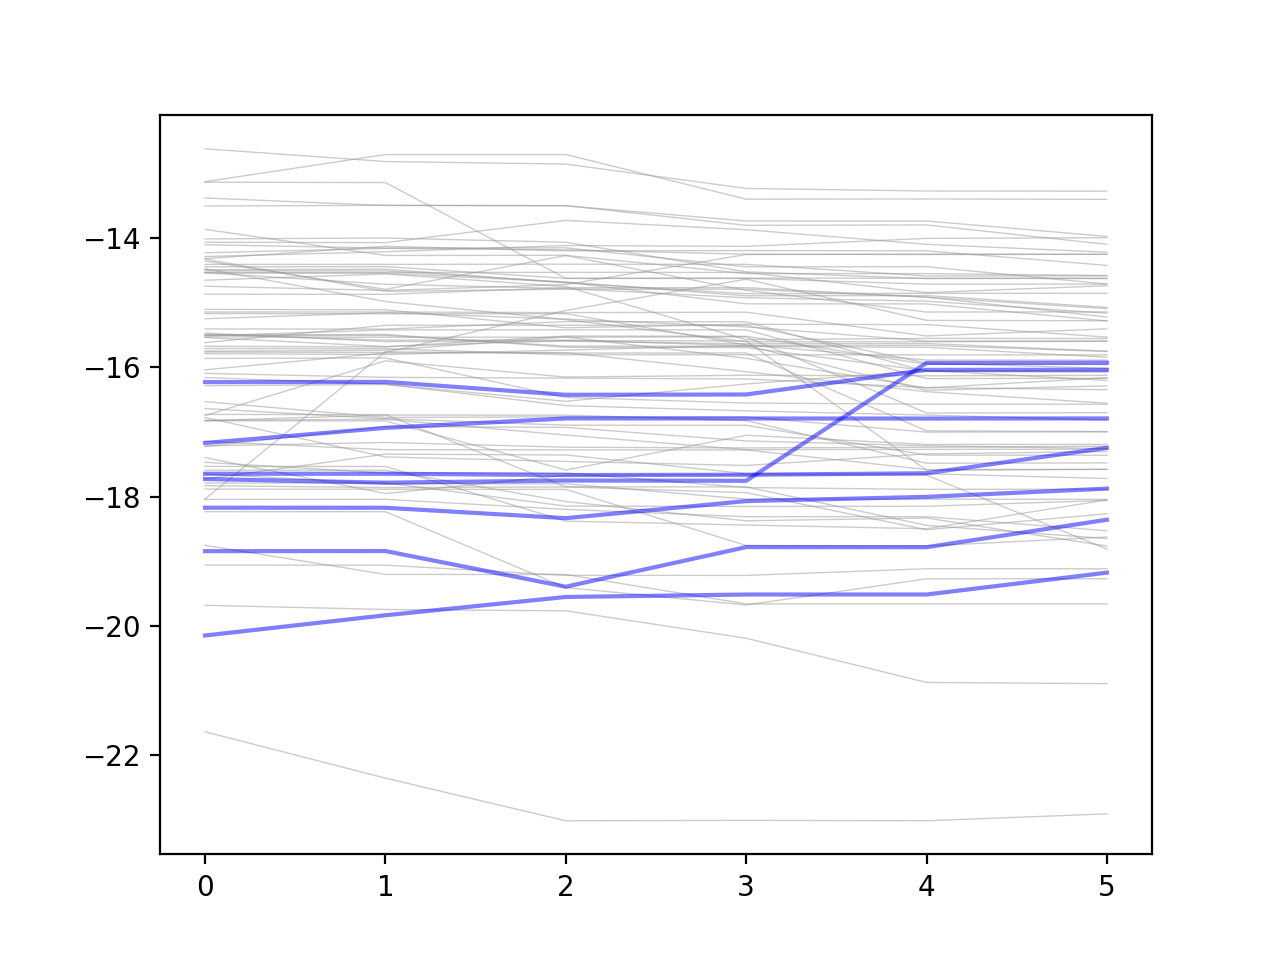

In [106]:
increase_rise_plot = np.intersect1d(increase_rise, np.where(consistent_arr > 0))
decrease_rise_plot = np.intersect1d(decrease_rise, np.where(consistent_arr > 0))

haha_rise = np.vstack((res_25.t0.values, 
                       res_30.t0.values,
                       res_35.t0.values,
                       res_40.t0.values,
                       res_45.t0.values,
                       res_50.t0.values))

plt.figure()
_ = plt.plot(haha_rise[:,increase_plot], color='0.6', alpha=0.5, lw=0.5)
_ = plt.plot(haha_rise[:,decrease_plot], color='Blue', alpha=0.5)

# plt.plot(haha[:, np.where(salt_df.values.name == 'ZTF18abgmcmv')[0]])

<IPython.core.display.Javascript object>


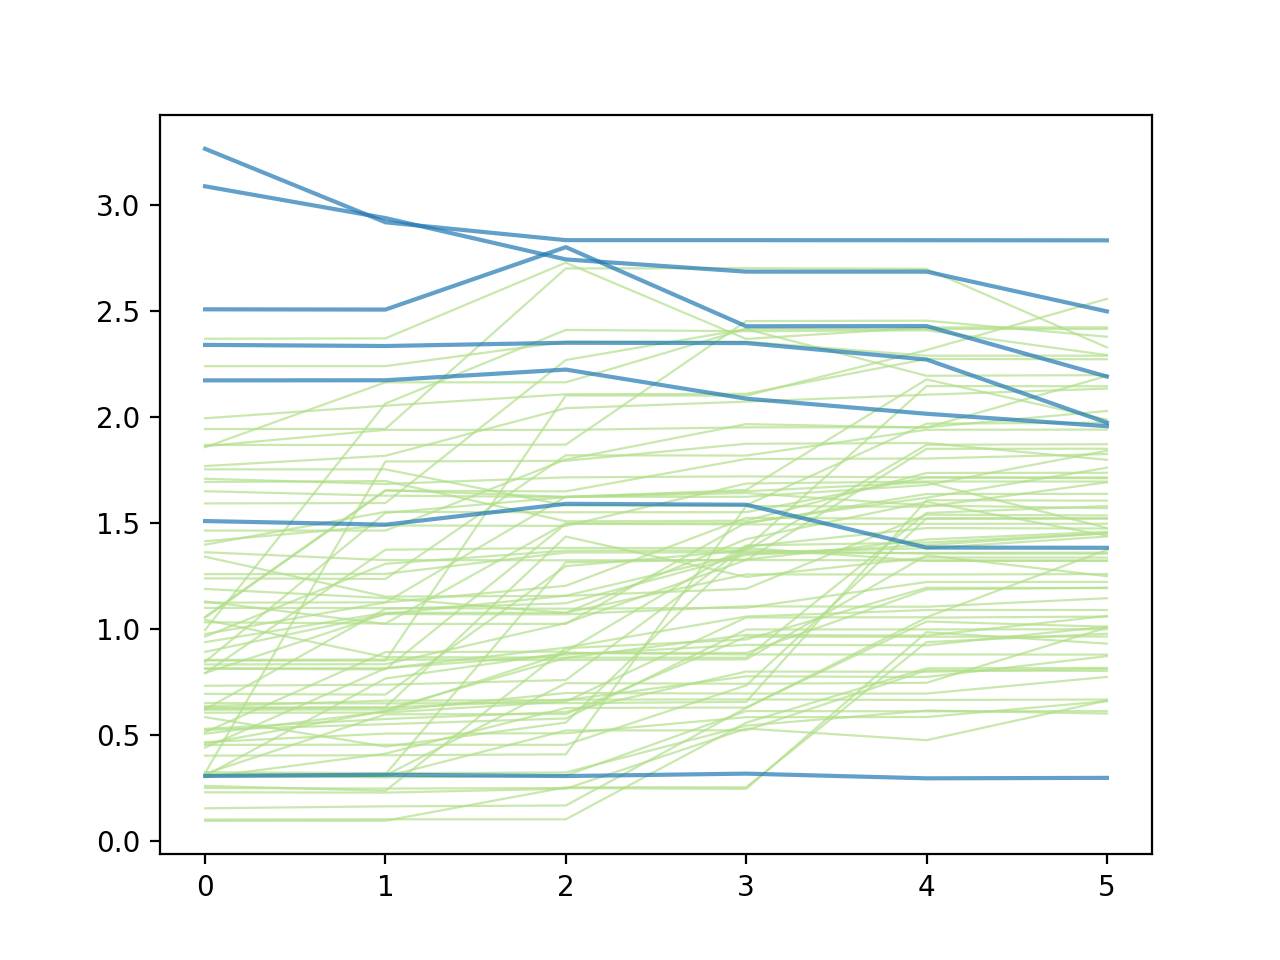

In [108]:
increase_alpha_plot = np.intersect1d(increase_alpha_g, np.where(consistent_arr > 0))
decrease_alpha_plot = np.intersect1d(decrease_alpha_g, np.where(consistent_arr > 0))

haha_alpha = np.vstack((res_25.alpha_g.values, 
                        res_30.alpha_g.values,
                        res_35.alpha_g.values,
                        res_40.alpha_g.values,
                        res_45.alpha_g.values,
                        res_50.alpha_g.values))

plt.figure()
_ = plt.plot(haha_alpha[:,increase_plot], color='#b2df8a', alpha=0.7, lw=0.8)
_ = plt.plot(haha_alpha[:,decrease_plot], color='#1f78b4', alpha=0.7, lw=1.5)

# plt.plot(haha[:, np.where(salt_df.values.name == 'ZTF18abgmcmv')[0]])

<IPython.core.display.Javascript object>


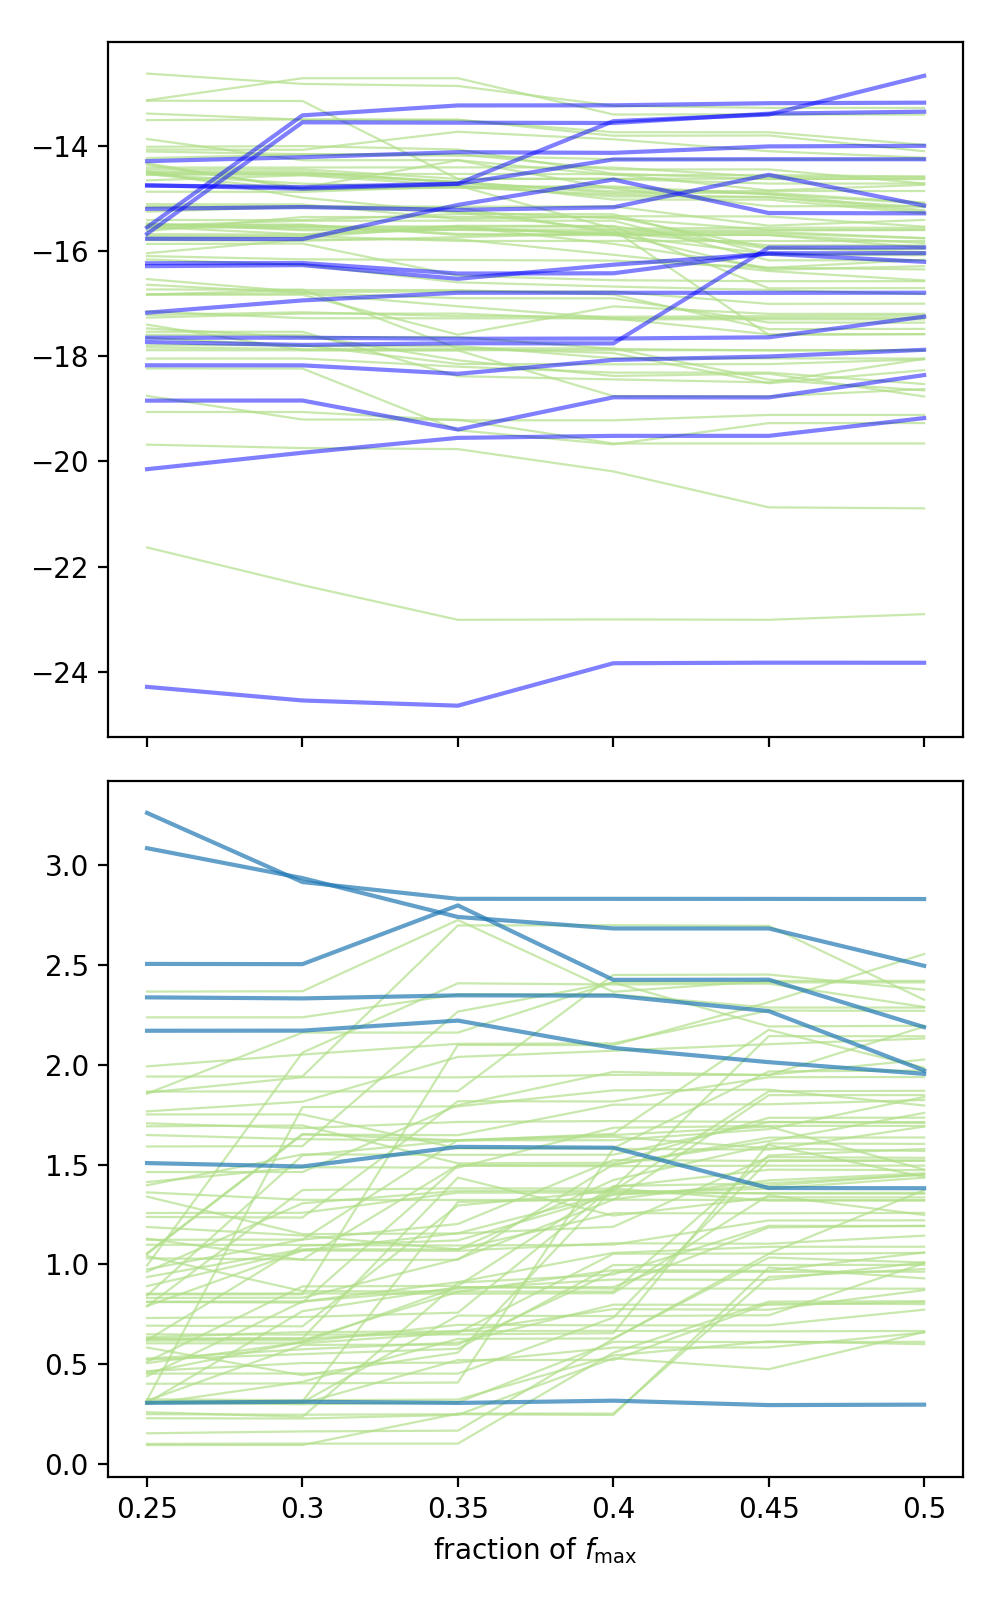

In [110]:
color_dict = {'decrease': '#1f78b4',
              'increase': '#b2df8a'}

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5,8), sharex=True)

_ = ax1.plot(haha_rise[:,increase_rise_plot], color='#b2df8a', alpha=0.7, lw=0.8)
_ = ax1.plot(haha_rise[:,decrease_rise_plot], color='Blue', alpha=0.5, lw=1.5)


_ = ax2.plot(haha_alpha[:,increase_alpha_plot], color='#b2df8a', alpha=0.7, lw=0.8)
_ = ax2.plot(haha_alpha[:,decrease_alpha_plot], color='#1f78b4', alpha=0.7, lw=1.5)


ax2.set_xticklabels([0.25,0.3,0.35,0.4,0.45,0.5])
ax2.set_xticks([0,1,2,3,4,5])
ax2.set_xlabel(r'fraction of $f_\mathrm{max}$')

fig.tight_layout()